In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
date=["2024-12-01","2024-12-02","2024-12-03","2024-12-04","2024-12-05"]
time=["10:00","11:00","12:00","13:00","12:00"]
location=["City A"]*5
pm25=[55.0,65.0,np.nan,70.0,80.0]
pm10=[120.0,np.nan,140.0,150.0,160.0]
temperature=[30.0,31.0,29.5,np.nan,28.0]
wind_speed=[10.5,9.0,8.5,7.0,np.nan]
data=pd.DataFrame({
    "Date":date,
    "Time":time,
    "Location":location,
    "PM2.5":pm25,
    "PM10":pm10,
    "Temperature":temperature,
    "Wind Speed":wind_speed
})

In [24]:
print("Original Data:")
print(data)

Original Data:
         Date   Time Location  PM2.5   PM10  Temperature  Wind Speed
0  2024-12-01  10:00   City A   55.0  120.0         30.0        10.5
1  2024-12-02  11:00   City A   65.0    NaN         31.0         9.0
2  2024-12-03  12:00   City A    NaN  140.0         29.5         8.5
3  2024-12-04  13:00   City A   70.0  150.0          NaN         7.0
4  2024-12-05  12:00   City A   80.0  160.0         28.0         NaN


In [26]:
data["PM2.5"].fillna(data["PM2.5"].mean(),inplace=True)
data["PM10"].fillna(data["PM10"].mean(),inplace=True)
data["Temperature"].fillna(data["Temperature"].mean(),inplace=True)
data["Wind Speed"].fillna(data["Wind Speed"].mean(),inplace=True)
print(data)


         Date   Time Location  PM2.5   PM10  Temperature  Wind Speed
0  2024-12-01  10:00   City A   55.0  120.0       30.000       10.50
1  2024-12-02  11:00   City A   65.0  142.5       31.000        9.00
2  2024-12-03  12:00   City A   67.5  140.0       29.500        8.50
3  2024-12-04  13:00   City A   70.0  150.0       29.625        7.00
4  2024-12-05  12:00   City A   80.0  160.0       28.000        8.75


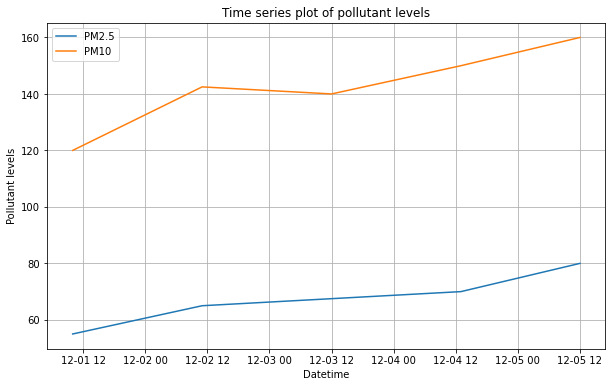

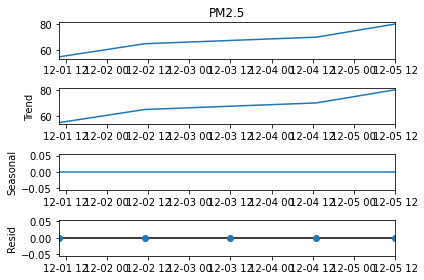

In [28]:
data["Datetime"]=pd.to_datetime(data["Date"]+" "+data["Time"])
plt.figure(figsize=(10,6))
plt.plot(data["Datetime"],data["PM2.5"],label="PM2.5")
plt.plot(data["Datetime"],data["PM10"],label="PM10")
plt.xlabel("Datetime")
plt.ylabel("Pollutant levels")
plt.title("Time series plot of pollutant levels")
plt.legend()
plt.grid(True)
plt.show()
data.set_index("Datetime",inplace=True)
decomposition=seasonal_decompose(data["PM2.5"],model="addictive",period=1)
decomposition.plot()
plt.show()